In [12]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import matplotlib.axes as axes

In [13]:
df = pd.read_csv('dataset.csv',engine='c',parse_dates=['DATE'])

In [14]:
df.DATE = df.DATE.astype(np.int64)

In [15]:
df.head()

,DATE,InterestRate,CPI,ExportImportRatio,USDTOINR
0,1262304000000000000,6.0,65.795346,61.570824,45.8944
1,1264982400000000000,6.0,65.030284,60.227108,46.2732
2,1267401600000000000,6.0,65.030284,68.363886,45.4509
3,1270080000000000000,6.0,65.030284,57.266479,44.4440
4,1272672000000000000,6.0,65.795346,58.096419,45.7690


In [16]:
ls = []
def date_vs_features(date,feature):
    
    date = pd.to_datetime(pd.Series([date])).astype(np.int64)

    X = pd.DataFrame(df['DATE']).values
    y = pd.DataFrame(df[feature]).values


    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

    reg = linear_model.LinearRegression()

    reg.fit(X_train,y_train)

    ls.append(reg.predict (np.array([date]).reshape(1,-1))[0][0])

In [17]:
def predict_USD(date):
    
    cols = list(df.columns)[1:4]
    for i in cols:
        date_vs_features(date,i)

    InterestRate,CPI,ExportImportRatio = ls
    
    date = pd.to_datetime(pd.Series([date])).astype(np.int64)

    X = df.drop('USDTOINR',axis=1).values
    y = pd.DataFrame(df['USDTOINR']).values


    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

    reg = linear_model.LinearRegression()

    reg.fit(X_train,y_train)
    
#   y_pred = reg.predict (np.array([1272672000000000000,6.0,65.795346,58.096419]).reshape(1,-1))

    y_pred = reg.predict(X_test)
    
    plt.scatter(X[:,0],y[:,0])
    plt.plot(X_test[:,0],y_pred[:,0],'-r')
    plt.title('Graph')
    plt.xlabel('Date')
    plt.ylabel('USD-INR')
    
    print ("Accuracy : ",round((r2_score(y_test,y_pred)*100),2),'%')
    
    USD = reg.predict (np.array([date,InterestRate,CPI,ExportImportRatio]).reshape(1,-1))
    
    return "Prediction : 1 USD = " + str(round(USD[0][0],2)) + " INR"

Accuracy :  91.04 %
Prediction : 1 USD = 74.51 INR


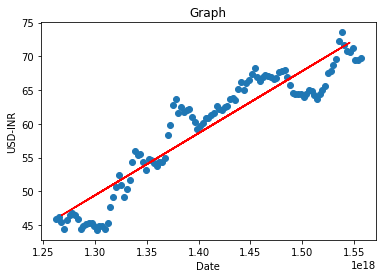

In [18]:
print (predict_USD('2019-11-08'))